In [3]:
from preprocess import preprocess_clustering_wine
from wrangle_wine import wrangle_wine

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [9]:
train, validate, test, train_scaled, validate_scaled, test_scaled  = wrangle_wine()

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red_or_white'],
      dtype='object')
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
6               7.9              0.60         0.06             1.6      0.069   
9               7.5              0.50         0.36             6.1      0.071   
10              7.5              0.50         0.36             6.1      0.071   
11              6.7              0.58         0.08             1.8      0.097   
16              8.5              0.28         0.56             1.8      0.092   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5          

In [10]:
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'white_wine'],
      dtype='object')

In [14]:
def preprocess_clustering_wine():
    '''
    Actions: scales data ready for modeling
    '''
    # get data
    train, validate, test, train_scaled, validate_scaled, test_scaled  = wrangle_wine()
    
#     # add needed column
#     train['is_high_quality'] = (train.quality == 7) | (train.quality == 6)
#     validate['is_high_quality'] = (validate.quality == 7) | (validate.quality == 6)
#     test['is_high_quality'] = (test.quality == 7) | (test.quality == 6)
    
    # set list of num columns
    num_cols = train.columns.drop('quality', 'white_wine')
    
    # xtrain, ytrain
    X_train_scaled = train_scaled[num_cols]
    X_train = train[num_cols]
    y_train = train[['quality']]

    # xvalidate, yvalidate
    X_validate_scaled = validate_scaled[num_cols]
    X_validate = validate[num_cols]
    y_validate = validate[['quality']]

    # xtest, ytest
    X_test_scaled = test_scaled[num_cols]
    X_test = test[num_cols]
    y_test = test[['quality']]
    
    # exit function and return
    return X_train_scaled, X_validate_scaled, X_test_scaled, X_train, X_validate, X_test, y_train, y_validate, y_test

In [16]:
X_train_scaled, X_validate_scaled, X_test_scaled, X_train, X_validate, X_test, y_train, y_validate, y_test = preprocess_clustering_wine()

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red_or_white'],
      dtype='object')
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
6               7.9              0.60         0.06             1.6      0.069   
9               7.5              0.50         0.36             6.1      0.071   
10              7.5              0.50         0.36             6.1      0.071   
11              6.7              0.58         0.08             1.8      0.097   
16              8.5              0.28         0.56             1.8      0.092   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5          

In [4]:
X_train_scaled.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [11]:
# list of variables I will cluster on. 
cluster_vars = ['alcohol','density', 'chlorides', 'volatile_acidity']
cluster_name = 'neg_corr_clusters'
k_range = range(2,20)


In [12]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

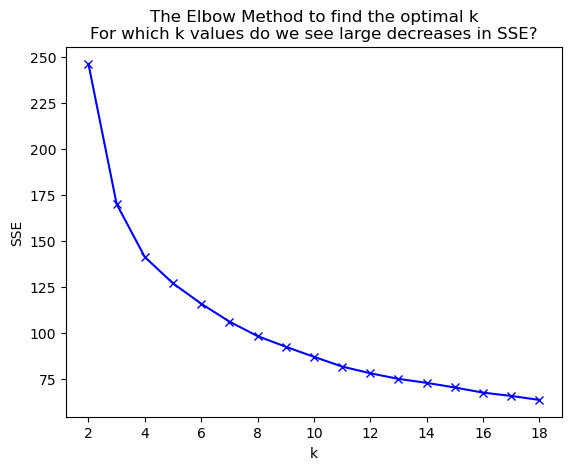

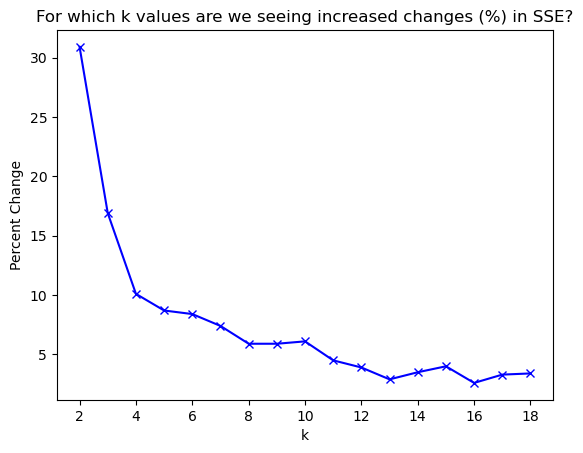

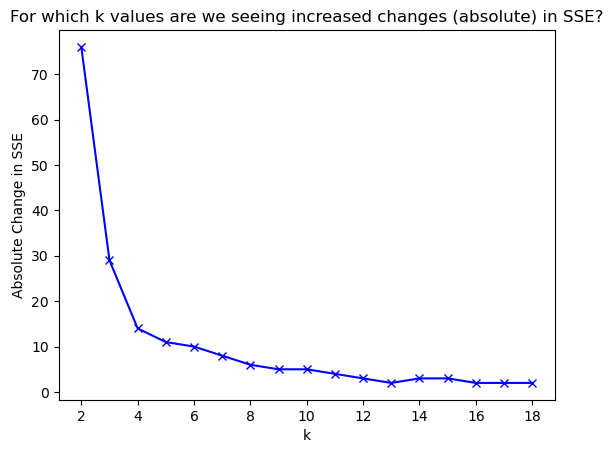

,k,sse,delta,pct_delta
0,2,246.261848,76.0,30.9
1,3,170.149501,29.0,16.9
2,4,141.358056,14.0,10.1
3,5,127.055865,11.0,8.7
4,6,116.016680,10.0,8.4
5,7,106.290082,8.0,7.4
6,8,98.398121,6.0,5.9
7,9,92.624015,5.0,5.9
8,10,87.143717,5.0,6.1
9,11,81.864254,4.0,4.5


In [13]:
find_k(X_train_scaled, cluster_vars, k_range)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=2)

# fit the data using RFE
rfe.fit(X_train_scaled,y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()


In [18]:
# view list of columns and their ranking

# get the ranks
var_ranks = rfe.ranking_
# get the variable names
var_names = X_train_scaled.columns.tolist()
# combine ranks and names into a df for clean viewing
rfe_ranks_df = pd.DataFrame({'Var': var_names, 'Rank': var_ranks})
# sort the df by rank
rfe_ranks_df.sort_values('Rank')


,Var,Rank
1,volatile_acidity,1
10,alcohol,1
9,sulphates,2
3,residual_sugar,3
7,density,4
11,white_wine,5
8,pH,6
0,fixed_acidity,7
5,free_sulfur_dioxide,8
6,total_sulfur_dioxide,9


In [21]:
rfe_mask = ['volatile_acidity', 'alcohol', 'sulphates', 'residual_sugar']